## PCO2 vs year

    The anthropogenic CO2 of the coastal waters was determined one of two ways. The
    higher density waters (σθ>25.0) were presumed to be consistent with open ocean waters.
    The large-scale open ocean anthropogenic CO2 distributions were evaluated by Sabine et
    al. (S13) for the entire Pacific using the ΔC* method. These estimates require a water
    mass age tracer, such as chlorofluorocarbons, which were not available for the coastal
    waters. Therefore, we took a subset of the stations used by Sabine et al. (S13) that were
    between 21 - 60°N and 140-109°W (Fig. S1) and fit the estimated anthropogenic CO2
    concentrations as a function of potential density (Fig. S2).
    Anthropogenic CO2 = -2742 + 225.31 (σθ) - 4.5604 (σθ)
2
 (S1) 
3
The data were limited to the upper 250 m of the water column since that is the maximum
depth of the coastal sections presented here. The anthropogenic CO2 of the coastal waters
was then calculated from potential density using equation S1. The highest densities were
comparable between the open ocean and the coastal waters.
The lower density waters (σθ<25.0) are generally found very near the surface or represent
coastal waters with river influences. Either way, these waters are not as strongly
connected with the subsurface open-ocean waters and are much more likely to be
tracking the current atmospheric CO2 concentrations. To estimate the pre-industrial DIC
concentration of these waters, the measured DIC and TA were used to calculate pCO2.
The calculated pCO2 was then decreased by the change in atmospheric CO2 between
1800 and 2007. This revised pCO2 was then used together with the TA to calculate a preindustrial DIC. The difference between the measured DIC and the estimated preindustrial DIC is taken as the anthropogenic CO2 of these waters. This is the same
approach used by Sabine et al. (S13) and others for determining surface water
anthropogenic CO2 concentrations.
The boundary between these two methods was chosen to be σθ=25.0 because the potential
density versus anthropogenic CO2 function showed much larger scatter at σθ<25.0 Also, a
σθ of 25.0 represents the highest density of surface waters from the open-ocean data set,
thus cutting all waters with densities lighter than 25.0 eliminated the variable surface
waters from the fit. 

In [48]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [49]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [50]:
from __future__ import print_function
from numpy import *
from scipy import *
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy as sp


import seawater
import datetime as dt
""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-whitegrid')
import netCDF4 as nc

import cmocean as cm
import glob
import sys
sys.path.append('/data/tjarniko/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/CCCmaDEV/CCCma_src')
import mocsy
import CCCma
import CCCma_stations as cs
from matplotlib import reload
import arrow
import gsw

%matplotlib inline

/home/tjarniko/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [51]:
fwk = nc.Dataset('/data/tjarniko/results/RFPARTY/rfncs/SKOG_1d_20181213_20190101_ptrc_T_20190101-20190101.nc')
zlevels = (fwk['deptht'][:])

# print(zlevels)
# print(zlevels[0:20])
# print(zlevels[20:27])
# print(zlevels[27:40])

In [52]:
test_LO = nc.Dataset('/results/forcing/LiveOcean/boundary_conditions/LiveOcean_v201712_y2016m11d24.nc')
test_BC = nc.Dataset('/data/tjarniko/results/RFPARTY/rfncs/SKOG_1d_20181213_20190101_carp_T_20190101-20190101.nc')
test_BC_grid = nc.Dataset('/data/tjarniko/results/RFPARTY/rfncs/SKOG_1d_20181213_20190101_grid_T_20190101-20190101.nc')


In [53]:
test_DIC = np.squeeze(test_BC['dissolved_inorganic_carbon'][:,:,360:460,20])
test_TA = np.squeeze(test_BC['total_alkalinity'][:,:,360:460,20])
test_T = np.squeeze(test_BC_grid['votemper'][:,:,360:460,20])
test_S = np.squeeze(test_BC_grid['vosaline'][:,:,360:460,20])


# Retrieve some DIC, TA, T, S from model output 20 grid-cells in from boundary

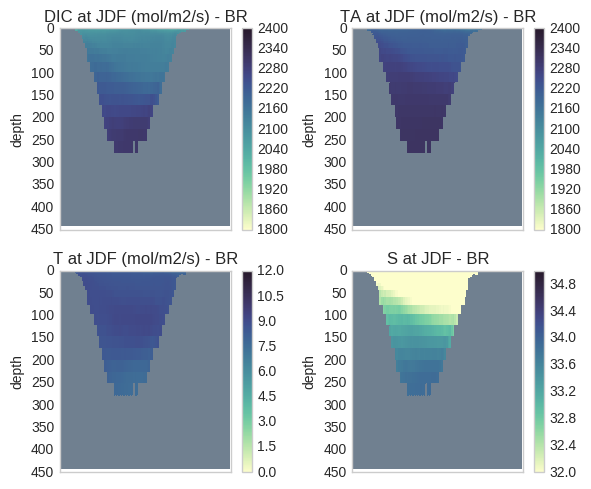

In [54]:
fig = plt.figure(figsize=(6,5))
nop = 4
for i in range(1,nop+1):
    if i == 1:
        ax = fig.add_subplot(2,nop/2,i)
        section_slice = np.arange(360, 460)
        sd = (test_DIC)
        tplt = np.ma.masked_values(sd,0)
        tcmap = cm.cm.deep
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt, cmap = tcmap, vmin=1800, vmax=2400)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('DIC at JDF (mol/m2/s) - BR') 
        ax.set_ylabel('depth')
        ax.set_xticklabels([])
    if i == 2:
        ax = fig.add_subplot(2,nop/2,i)
        section_slice = np.arange(360, 460)
        sd = (test_TA)
        tplt = np.ma.masked_values(sd,0)
        tcmap = cm.cm.deep
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt, cmap = tcmap, vmin=1800, vmax=2400)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('TA at JDF (mol/m2/s) - BR') 
        ax.set_ylabel('depth')
        ax.set_xticklabels([])
        
    if i == 3:
        ax = fig.add_subplot(2,nop/2,i)
        section_slice = np.arange(360, 460)
        sd = (test_T)
        tplt = np.ma.masked_values(sd,0)
        tcmap = cm.cm.deep
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt, cmap = tcmap, vmin=0, vmax=12)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('T at JDF (mol/m2/s) - BR') 
        ax.set_ylabel('depth')
        ax.set_xticklabels([])

    if i == 4:
        ax = fig.add_subplot(2,nop/2,i)
        section_slice = np.arange(360, 460)
        sd = (test_S)
        tplt = np.ma.masked_values(sd,0)
        tcmap = cm.cm.deep
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt, cmap = tcmap, vmin=32, vmax=35)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('S at JDF - BR') 
        ax.set_ylabel('depth')
        ax.set_xticklabels([])

plt.tight_layout()

In [55]:
dimen_bdy = np.shape(test_S)
width_slice = dimen_bdy[1]
d = zlevels
depth_broad = np.empty((40, width_slice))
for b in range(0,width_slice):

    depth_broad[:,b] = zlevels
    
depth_broad2 = np.zeros((40, width_slice))

In [56]:
def oned_moxy(tsal, ttemp, tdic, tta, pres_atm, depth_this):

    size_box = np.shape(tdic)
    size_0 = size_box[0]
    size_1= size_box[1]


    tsra = np.ravel(tsal)
    ttera = np.ravel(ttemp)
    ttara = np.ravel(tta) * 1e-3
    tdra = np.ravel(tdic) * 1e-3
    tzero = np.zeros_like(tsra)
    tpressure = np.zeros_like(tsra)
    #tdepth = np.zeros_like(tsra)
    tpressure[:] = pres_atm
    tdepth = np.ravel(depth_this)
    tzero = tpressure * 0 
        
    tsra_psu = tsra*35/35.16504
    ttera_is = gsw.t_from_CT(tsra,ttera,tzero)

    response_tup = mocsy.mvars(temp=ttera_is, sal=tsra_psu, alk=ttara, dic=tdra, 
                       sil=tzero, phos=tzero, patm=tpressure, depth=tdepth, lat=tzero, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
    pH,pco2,fco2,co2,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup

    pHr = pH.reshape(size_0,size_1)
    OmAr = OmegaA.reshape(size_0,size_1)
    pco2r = pco2.reshape(size_0,size_1)
    
    return pHr, OmAr, pco2r

In [57]:
pHr, OmAr, pco2r = oned_moxy(test_S, test_T, test_DIC, test_TA, 1, depth_broad)
pHr2, OmAr2, pco2r2 = oned_moxy(test_S, test_T, test_DIC, test_TA, 1, depth_broad2)

# use MOCSY to calculate pCO2 - both with actual depth and with depth = 0 

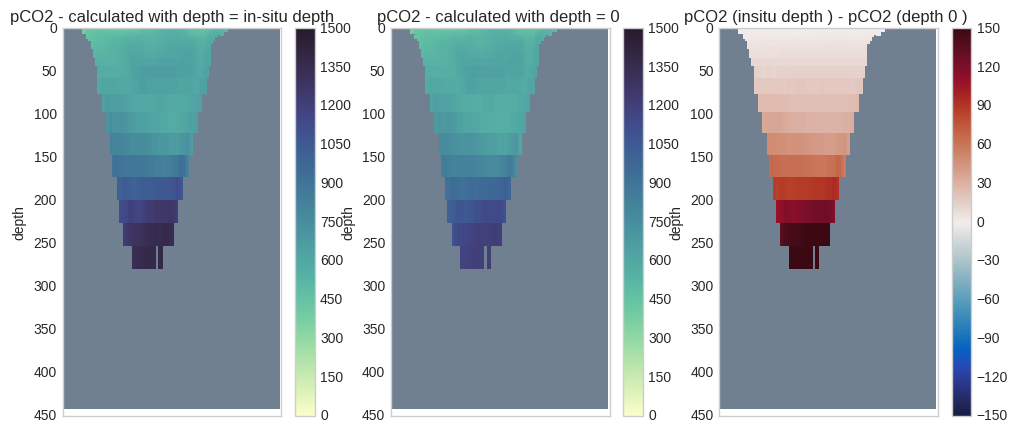

In [58]:
fig = plt.figure(figsize=(12,5))
nop = 3
for i in range(1,nop+1):
    if i == 1:
        ax = fig.add_subplot(1,nop,i)
        section_slice = np.arange(360, 460)
        sd = (pco2r)
        tplt = np.ma.masked_values(sd,1e20)
        tcmap = cm.cm.deep
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt, cmap = tcmap, vmin=0, vmax=1500)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('pCO2 - calculated with depth = in-situ depth') 
        ax.set_ylabel('depth')
        ax.set_xticklabels([])
    if i == 2:
        ax = fig.add_subplot(1,nop,i)
        section_slice = np.arange(360, 460)
        sd = (pco2r2)
        tplt = np.ma.masked_values(sd,1e20)
        tcmap = cm.cm.deep
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt, cmap = tcmap, vmin=0, vmax=1500)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('pCO2 - calculated with depth = 0 ') 
        ax.set_ylabel('depth')
        ax.set_xticklabels([])
        
    if i == 3:
        ax = fig.add_subplot(1,nop,i)
        section_slice = np.arange(360, 460)
        sd = (pco2r-pco2r2)
        tplt = np.ma.masked_values(sd,0)
        tcmap = cm.cm.balance
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt, cmap = tcmap, vmin=-150, vmax=150)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('pCO2 (insitu depth ) - pCO2 (depth 0 ) ') 
        ax.set_ylabel('depth')
        ax.set_xticklabels([])


# Make a simplified linear relationship between time and atm-co2 

    1. Pretend all was at the surface in the last year.  
    So for each water box, calculate the equilibrium pCO2 with the 
    current atmospheric concentration at surface pressure and then 
    all the other properties, T, S, TA, etc as in the water box.

    2. Pretend there is a gradient in age with depth.  
    Water at the surface was in contact this year, but age increases 
    with depth linearly, so it is 300 years old at 300 m depth.  (age == depth)

    3. Or much more realistically, age at the bottom is 50 years old.


(250, 420)

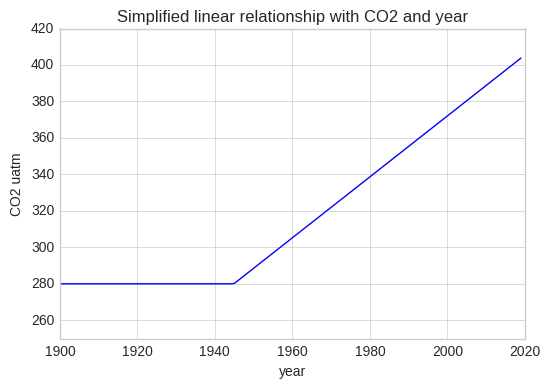

In [59]:
slope = 1.6707166921
interc = -2969.3855587

yrs = np.arange(1900,2020,1)
conc_co2 = yrs*slope + interc
conc_co2[conc_co2<280] = 280
plt.plot(yrs,conc_co2)
plt.title('Simplified linear relationship with CO2 and year')
plt.ylabel('CO2 uatm')
plt.xlabel('year')
plt.ylim([250,420])

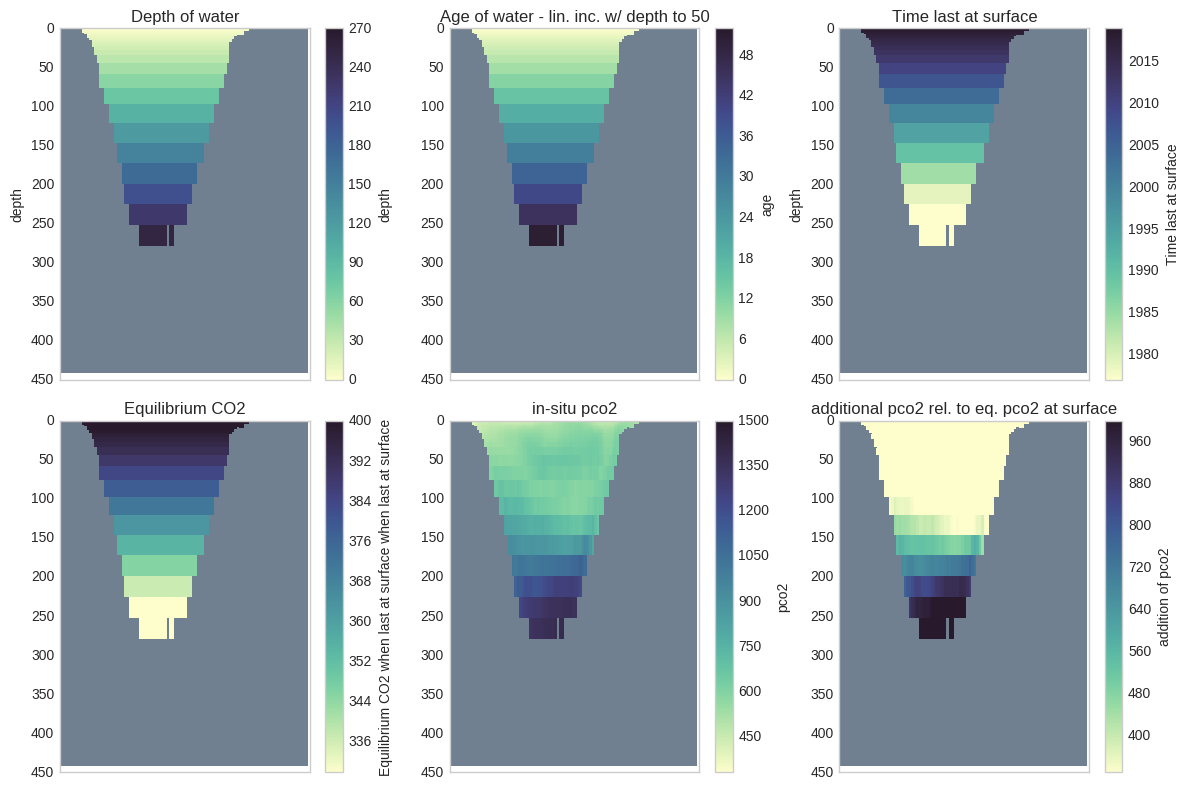

In [60]:
fig = plt.figure(figsize=(12,8))
nop = 6
for i in range(1,nop+1):
    if i == 1:
        ax = fig.add_subplot(2,nop/2,i)
        section_slice = np.arange(360, 460)
        sd = (depth_broad)
        mask = np.where(pco2r2 == 1e20)
        depth_broad[mask] = 1e20
        tplt = np.ma.masked_values(sd,1e20)
        tcmap = cm.cm.deep
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt, cmap = tcmap, vmin=0, vmax=270)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('Depth of water') 
        cbar.set_label('depth')
        ax.set_ylabel('depth')
        ax.set_xticklabels([])
        
    if i == 2:
        ax = fig.add_subplot(2,nop/2,i)
        section_slice = np.arange(360, 460)
        proxy_age = (depth_broad/5)
        mask = np.where(pco2r2 == 1e20)
        proxy_age[mask] = 1e20
        tplt = np.ma.masked_values(proxy_age,1e20)
        tcmap = cm.cm.deep
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt, cmap = tcmap, vmin=0, vmax=52)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('Age of water - lin. inc. w/ depth to 50') 
        cbar.set_label('age')
        #ax.set_ylabel('depth')
        ax.set_xticklabels([])
        
    if i == 3:
        ax = fig.add_subplot(2,nop/2,i)
        section_slice = np.arange(360, 460)
        sd = 2019 - proxy_age 
        year_surf = 2019 - proxy_age
        mask = np.where(pco2r2 == 1e20)
        sd[mask] = 1e20
        tplt = np.ma.masked_values(sd,1e20)
        tcmap = cm.cm.deep
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt, cmap = tcmap, vmin=1977, vmax=2019)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('Time last at surface') 
        cbar.set_label('Time last at surface')
        ax.set_ylabel('depth')
        ax.set_xticklabels([])
        
    if i == 4:
        ax = fig.add_subplot(2,nop/2,i)
        section_slice = np.arange(360, 460)
        sd = 2019 - proxy_age 
        year_surf = 2019 - proxy_age 
        co2_eq = year_surf* slope + interc
        mask = np.where(pco2r2 == 1e20)
        co2_eq[mask] = 1e20
        tplt = np.ma.masked_values(co2_eq,1e20)
        tcmap = cm.cm.deep
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt, cmap = tcmap, vmin=330, vmax=400)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('Equilibrium CO2') 
        cbar.set_label('Equilibrium CO2 when last at surface when last at surface')
        #ax.set_ylabel('depth')
        ax.set_xticklabels([])
        
    if i == 5:
        ax = fig.add_subplot(2,nop/2,i)
        section_slice = np.arange(360, 460)
        sd = pco2r
        tplt = np.ma.masked_values(sd,1e20)
        tcmap = cm.cm.deep
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt, cmap = tcmap, vmin=330, vmax=1500)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('in-situ pco2') 
        cbar.set_label('pco2')
        #ax.set_ylabel('depth')
        ax.set_xticklabels([])
        
    if i == 6:
        ax = fig.add_subplot(2,nop/2,i)
        section_slice = np.arange(360, 460)
        sd = pco2r - co2_eq
        tplt = np.ma.masked_values(sd,0)
        tcmap = cm.cm.deep
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt, cmap = tcmap, vmin=330, vmax=1000)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('additional pco2 rel. to eq. pco2 at surface') 
        cbar.set_label('addition of pco2')
        #ax.set_ylabel('depth')
        ax.set_xticklabels([])
        
    plt.tight_layout()

In [187]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx, array[idx]

def find_DIC_corresp_to_pco2(tsal, ttemp, tpco2, tta, pres_atm, depth_this):
    
    steps = 10000
    tsal_r = np.zeros([steps])
    tsal_r[:] = tsal
    ttemp_r = np.zeros([steps])
    ttemp_r[:] = ttemp
    tta_r = np.zeros([steps])
    tta_r[:] = tta * 1e-3
    tpres_r = np.zeros([steps])
    tpres_r[:] = pres_atm
    depth_r = np.zeros([steps])
    depth_r[:] = depth_this
    tzero = np.zeros([steps])

    end_d = 2400
    start_d = 600
    intvl = (end_d - start_d)/steps
    tdic_r = np.arange(start_d,end_d-0.1,intvl) * 1e-3
    
    response_tup = mocsy.mvars(temp=ttemp_r, sal=tsal_r, alk=tta_r, dic=tdic_r, 
                       sil=tzero, phos=tzero, patm=tpres_r, depth=depth_r, lat=tzero, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
    pH,pco2,fco2,co2,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup    
    
    diffmat = pco2 - tpco2
    idx, ans = find_nearest( diffmat,0 )
    
    if ans> 2:
        print('Danger, pco2 found >2 uatm from pco2 given')
#     print(idx)
#     print('difference between real pco2 and pco2 from calc. dic: ',ans)
#     print('DIC found this way:', tdic_r[idx]*1e3)
    fin_dic = tdic_r[idx]*1e3
    return fin_dic
    
    

In [188]:
S = 30
T = 10
pco2 = 720
TA = 2200
pres = 1
depth = 90
find_DIC_corresp_to_pco2(S, T, pco2, TA, pres, depth)

2121.8999999995772

In [201]:
dim1, dim2 = np.shape(co2_eq)
# print(dim1)
# print(dim2)

co2_eq_r = np.ravel(co2_eq)
TA_r = np.ravel(test_TA)
S_r = np.ravel(test_S)
T_r = np.ravel(test_T)
depth_r = np.ravel(depth_broad)

dic_eq_r = np.zeros_like(co2_eq_r)

for i in range(0,len(dic_eq_r)):
    if i%200 == 0:
        print(i)
    tdic = find_DIC_corresp_to_pco2(S_r[i], T_r[i], co2_eq_r[i], TA_r[i], 1, depth_r[i]) 
    dic_eq_r[i] = tdic

0
200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000
3200
3400
3600
3800


In [202]:
dic_res = dic_eq_r.reshape(dim1,dim2)

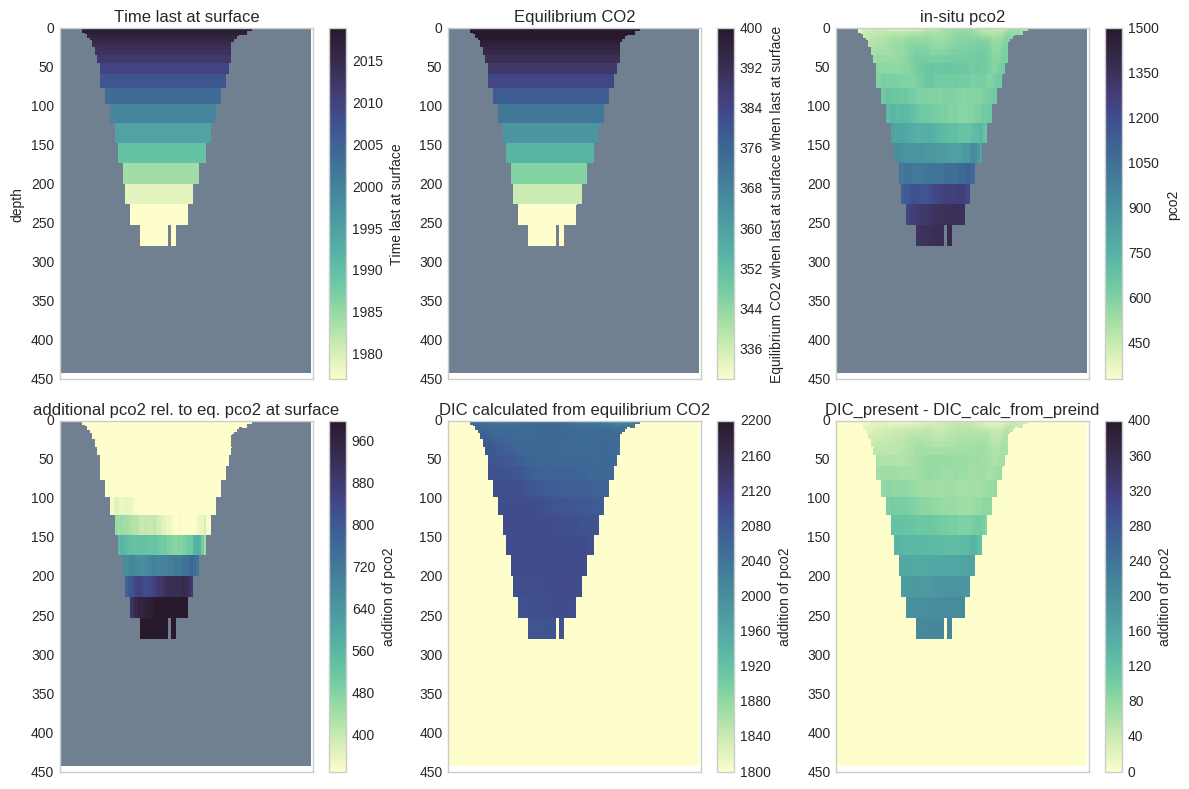

In [206]:
fig = plt.figure(figsize=(12,8))
nop = 6
for i in range(1,nop+1):

    if i == 1:
        ax = fig.add_subplot(2,nop/2,i)
        section_slice = np.arange(360, 460)
        sd = 2019 - proxy_age 
        year_surf = 2019 - proxy_age
        mask = np.where(pco2r2 == 1e20)
        sd[mask] = 1e20
        tplt = np.ma.masked_values(sd,1e20)
        tcmap = cm.cm.deep
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt, cmap = tcmap, vmin=1977, vmax=2019)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('Time last at surface') 
        cbar.set_label('Time last at surface')
        ax.set_ylabel('depth')
        ax.set_xticklabels([])
        
    if i == 2:
        ax = fig.add_subplot(2,nop/2,i)
        section_slice = np.arange(360, 460)
        sd = 2019 - proxy_age 
        year_surf = 2019 - proxy_age 
        co2_eq = year_surf* slope + interc
        mask = np.where(pco2r2 == 1e20)
        co2_eq[mask] = 1e20
        tplt = np.ma.masked_values(co2_eq,1e20)
        tcmap = cm.cm.deep
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt, cmap = tcmap, vmin=330, vmax=400)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('Equilibrium CO2') 
        cbar.set_label('Equilibrium CO2 when last at surface when last at surface')
        #ax.set_ylabel('depth')
        ax.set_xticklabels([])
        
    if i == 3:
        ax = fig.add_subplot(2,nop/2,i)
        section_slice = np.arange(360, 460)
        sd = pco2r
        tplt = np.ma.masked_values(sd,1e20)
        tcmap = cm.cm.deep
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt, cmap = tcmap, vmin=330, vmax=1500)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('in-situ pco2') 
        cbar.set_label('pco2')
        #ax.set_ylabel('depth')
        ax.set_xticklabels([])
        
    if i == 4:
        ax = fig.add_subplot(2,nop/2,i)
        section_slice = np.arange(360, 460)
        sd = pco2r - co2_eq
        tplt = np.ma.masked_values(sd,0)
        tcmap = cm.cm.deep
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt, cmap = tcmap, vmin=330, vmax=1000)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('additional pco2 rel. to eq. pco2 at surface') 
        cbar.set_label('addition of pco2')
        #ax.set_ylabel('depth')
        ax.set_xticklabels([])

    if i == 5:
        ax = fig.add_subplot(2,nop/2,i)
        section_slice = np.arange(360, 460)
        sd = dic_res
        tplt = np.ma.masked_values(sd,0)
        tcmap = cm.cm.deep
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt, cmap = tcmap, vmin=1800, vmax=2200)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('DIC calculated from equilibrium CO2') 
        cbar.set_label('addition of pco2')
        #ax.set_ylabel('depth')
        ax.set_xticklabels([])

    if i == 6:
        ax = fig.add_subplot(2,nop/2,i)
        section_slice = np.arange(360, 460)
        sd = test_DIC - dic_res 
        tplt = np.ma.masked_values(sd,0)
        tcmap = cm.cm.deep
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt, cmap = tcmap, vmin=0, vmax=400)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('DIC_present - DIC_calc_from_preind') 
        cbar.set_label('addition of pco2')
        #ax.set_ylabel('depth')
        ax.set_xticklabels([])        
    plt.tight_layout()